Generated Data (X):
[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]


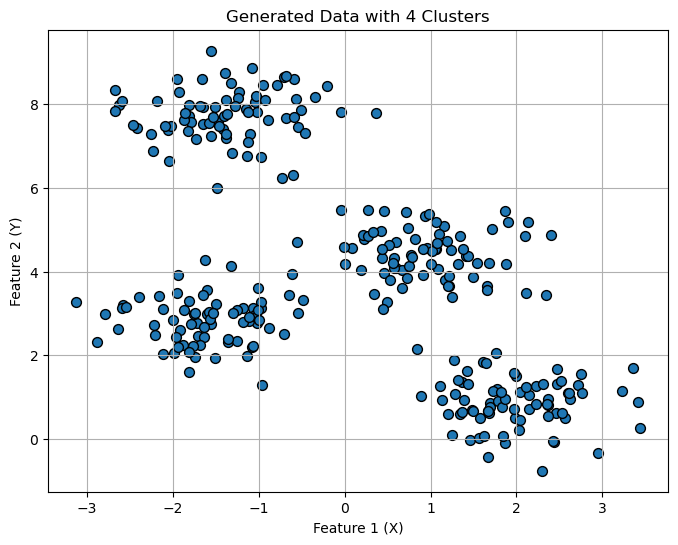

C:\Users\zhenruyi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zhenruyi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zhenruyi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zhenruyi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

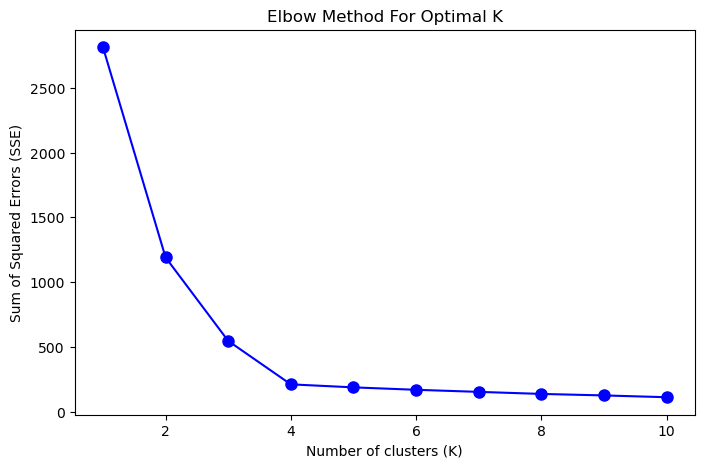

In [5]:
# 肘部法则案例代码

from sklearn.cluster import KMeans
# 导入必要的库
from sklearn.datasets import make_blobs  # 用于生成模拟聚类数据
import matplotlib.pyplot as plt  # 用于数据可视化

# 使用 make_blobs 生成模拟数据集
# make_blobs 是 scikit-learn 中用于生成聚类数据的函数
# 它可以生成多个簇（blobs），每个簇的数据点服从高斯分布（正态分布）
# 返回值：
#   - X: 数据点的坐标，形状为 (n_samples, n_features)
#   - _: 数据点的标签（即属于哪个簇），这里用 _ 忽略
X, _ = make_blobs(
    n_samples=300,  # 生成 300 个样本点
    centers=4,      # 生成 4 个簇（即 4 个中心点）
    cluster_std=0.60,  # 每个簇的标准差，控制簇的分布紧密程度
                       # 值越小，簇内的点越集中；值越大，簇内的点越分散
    random_state=0   # 随机种子，确保每次生成的数据集相同，便于复现实验结果
)

# 打印生成的数据
# X 是一个二维数组，形状为 (300, 2)，表示 300 个样本点，每个样本点有 2 个特征（x 和 y 坐标）
print("Generated Data (X):")
print(X)

# 可视化生成的数据
# 使用 matplotlib 绘制散点图，直观展示数据的分布
plt.figure(figsize=(8, 6))  # 设置画布大小
plt.scatter(
    X[:, 0],  # 所有样本点的第一个特征（x 坐标）
    X[:, 1],  # 所有样本点的第二个特征（y 坐标）
    s=50,     # 点的大小
    edgecolor='k'  # 点的边缘颜色为黑色
)
plt.title("Generated Data with 4 Clusters")  # 设置标题
plt.xlabel("Feature 1 (X)")  # 设置 x 轴标签
plt.ylabel("Feature 2 (Y)")  # 设置 y 轴标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图像

# 数据示例：
# X 的每一行表示一个样本点的坐标，例如：
# array([[ 2.04940444,  0.84073272],
#        [ 1.15157493,  4.76883686],
#        [ 0.77672328,  4.66664743],
#        ...,
#        [ 9.20551979,  4.4813144 ],
#        [ 9.89620891,  3.79483681],
#        [ 9.37447406,  3.07902214]])
# 其中 [2.04940444, 0.84073272] 表示一个点的 x 坐标为 2.04940444，y 坐标为 0.84073272

# 应用场景：
# 1. 测试聚类算法：生成的数据集可以用于测试 K-means、DBSCAN 等聚类算法的性能。
# 2. 教学演示：用于演示聚类算法的原理和效果，帮助学生理解簇的概念和聚类过程。
# 3. 算法对比：通过调整 centers 和 cluster_std 参数，生成不同复杂度的数据集，用于对比不同聚类算法的鲁棒性和性能。

# 计算SSE
sse = []
K_range = range(1, 11)
for k in K_range:
    # 初始化 KMeans 聚类模型
    # KMeans 是 scikit-learn 中实现 K-means 聚类算法的类
    # K-means 是一种划分聚类算法，通过迭代优化将数据划分为 K 个簇
    kmeans = KMeans(
        n_clusters=k,       # 指定簇的数量 K，即希望将数据划分为多少个簇
        random_state=42,    # 随机种子，用于控制算法的随机性
                            # 设置固定的 random_state 可以确保每次运行代码时结果一致，便于复现实验
        n_init=10           # 指定算法运行的次数，每次使用不同的初始质心
                            # K-means 的结果受初始质心影响较大，n_init 表示尝试多次并选择最优结果
                            # 默认值为 10，表示运行 10 次并选择 SSE（误差平方和）最小的一次作为最终结果
    )

    # 参数详解：
    # - n_clusters: 必须指定的参数，表示簇的数量 K。
    # - random_state: 随机种子，确保结果可复现。
    # - n_init: 运行次数，用于减少初始质心对结果的影响。

    # 返回值：
    # kmeans 是一个 KMeans 模型对象，可以通过以下方法使用：
    # - kmeans.fit(X): 对数据 X 进行聚类。
    # - kmeans.predict(X): 预测新数据点的簇标签。
    # - kmeans.cluster_centers_: 获取聚类后的簇中心坐标。
    # - kmeans.labels_: 获取每个样本点的簇标签。

    # 示例：
    # 假设 k=3，表示将数据分为 3 个簇
    # 1. 初始化模型：
    #    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    # 2. 训练模型：
    #    kmeans.fit(X)
    # 3. 获取簇中心：
    #    centers = kmeans.cluster_centers_
    # 4. 获取每个样本点的簇标签：
    #    labels = kmeans.labels_

    # 注意事项：
    # - K-means 对初始质心敏感，设置 n_init 可以减少随机性影响。
    # - random_state 用于确保结果可复现，适合教学和实验场景。
    # - n_clusters 的选择可以通过肘部法则或轮廓系数等方法确定。
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # SSE存储在inertia_属性中

# 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

Silhouette Scores for different K values:
K = 2: Silhouette Score = 0.5473
K = 3: Silhouette Score = 0.5876
K = 4: Silhouette Score = 0.6820
K = 5: Silhouette Score = 0.5654
K = 6: Silhouette Score = 0.4610
K = 7: Silhouette Score = 0.4047
K = 8: Silhouette Score = 0.4148
K = 9: Silhouette Score = 0.3283
K = 10: Silhouette Score = 0.3306


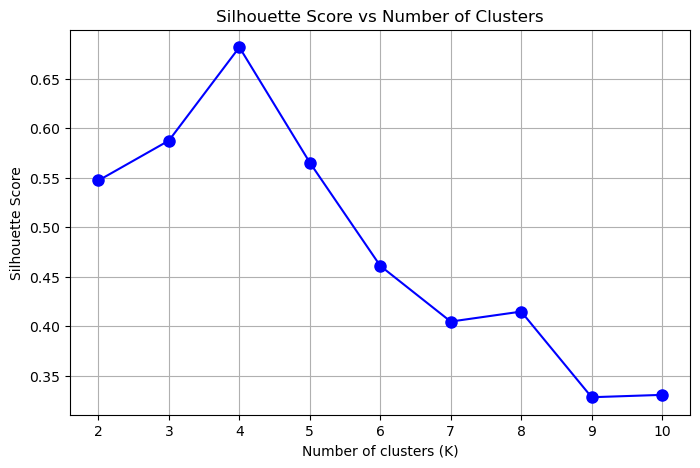

In [3]:
import numpy as np
from sklearn.metrics import pairwise_distances  # 计算距离矩阵
from sklearn.datasets import make_blobs  # 生成模拟数据
from sklearn.metrics import silhouette_score  # 轮廓系数计算
import matplotlib.pyplot as plt  # 数据可视化

# 自定义 K-medoids 算法
def kmedoids(X, k, max_iter=300, random_state=42):
    """
    实现 K-medoids 算法
    :param X: 数据集，形状为 (n_samples, n_features)，n_samples 是样本数量，n_features 是特征数量
    :param k: 簇的数量，即希望将数据划分为多少个簇
    :param max_iter: 最大迭代次数，控制算法的运行时间
    :param random_state: 随机种子，用于控制随机性，确保结果可复现
    :return: medoids, labels
        - medoids: 最终的 medoid 点，形状为 (k, n_features)
        - labels: 每个样本点所属的簇标签，形状为 (n_samples,)
    """
    # 设置随机种子，确保每次运行结果一致
    np.random.seed(random_state)

    # 初始化：随机选择 k 个 medoid
    n_samples = X.shape[0]  # 获取样本数量
    medoids_idx = np.random.choice(n_samples, k, replace=False)  # 随机选择 k 个样本点作为初始 medoid
    medoids = X[medoids_idx]  # 获取这些样本点的坐标

    # 迭代优化
    for _ in range(max_iter):
        # 计算每个点到 medoids 的距离
        # pairwise_distances 计算 X 中每个点到 medoids 中每个点的距离
        # 结果是一个距离矩阵，形状为 (n_samples, k)
        distances = pairwise_distances(X, medoids, metric='euclidean')

        # 分配每个点到最近的 medoid
        # np.argmin 返回每个样本点到 medoids 的最小距离的索引，即所属的簇标签
        labels = np.argmin(distances, axis=1)

        # 更新 medoids
        new_medoids = medoids.copy()  # 创建一个 medoids 的副本，用于存储新的 medoid
        for i in range(k):
            # 找到当前簇的所有点
            cluster_points = X[labels == i]  # 获取属于第 i 个簇的所有点

            # 计算簇内每个点到其他点的总距离
            if len(cluster_points) > 0:
                # pairwise_distances 计算簇内点之间的距离
                cluster_distances = pairwise_distances(cluster_points, metric='euclidean')
                # np.sum 计算每个点到其他点的总距离
                total_distances = np.sum(cluster_distances, axis=1)

                # 选择总距离最小的点作为新的 medoid
                new_medoid_idx = np.argmin(total_distances)  # 找到总距离最小的点的索引
                new_medoids[i] = cluster_points[new_medoid_idx]  # 更新 medoid

        # 如果 medoids 不再变化，停止迭代
        if np.all(medoids == new_medoids):
            break  # 如果 medoids 没有变化，说明算法已经收敛，退出循环

        medoids = new_medoids  # 更新 medoids

    # 返回最终的 medoids 和每个样本点的簇标签
    return medoids, labels

# 生成模拟数据
# make_blobs 生成一个包含 300 个样本点的二维数据集，分为 4 个簇
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 定义 K 值范围
K_range = range(2, 11)  # 尝试 K 从 2 到 10
silhouette_scores = []  # 存储每个 K 值对应的轮廓系数

# 遍历 K 值，计算轮廓系数
for k in K_range:
    # 使用自定义 K-medoids 算法进行聚类
    medoids, labels = kmedoids(X, k)

    # 计算轮廓系数
    # silhouette_score 需要两个参数：
    # - X: 数据集
    # - labels: 每个样本点的簇标签
    score = silhouette_score(X, labels)
    
    # 将轮廓系数保存到列表中
    silhouette_scores.append(score)

# 打印每个 K 值对应的轮廓系数
print("Silhouette Scores for different K values:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K = {k}: Silhouette Score = {score:.4f}")

# 绘制轮廓系数随 K 值变化的曲线
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()